In [191]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

1. Extração dos dados

In [192]:
url = r'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'

requsicao = requests.get(url)
requsicao = requsicao.json()

dados = pd.json_normalize(requsicao)
dados.to_csv('Conversão_JSON.csv', index= False)

In [193]:
df = pd.read_csv('Conversão_JSON.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


2. Informações da base de dados

In [194]:
df.describe(include=object)

,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7043,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [196]:
df.shape

(7267, 21)

In [197]:
colunas = df.columns
colunas

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [198]:
colunas_unique = [x for x in df.columns if df[x].dtypes == 'object' and x!="customerID"]

for valor in colunas_unique:
    print(f'{valor}: {df[valor].unique()}')

Churn: ['No' 'Yes' nan]
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


3. Tratando valores nulos

In [199]:
sum(df['Churn'].isnull())

224

In [200]:
df = df.dropna()
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [201]:
df = df.reset_index()
df = df.drop(columns= 'index')
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [202]:
df['internet.InternetService'].replace('No', 'No service', inplace= True)
df['internet.InternetService'].value_counts()

internet.InternetService
Fiber optic    3096
DSL            2421
No service     1526
Name: count, dtype: int64

In [203]:
df.loc[df['account.Charges.Total'] == " "]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
945,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1731,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No service,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1906,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2025,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No service,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2176,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No service,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2250,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No service,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2855,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3052,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No service,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3118,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4054,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [204]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [205]:
dados_faltantes = df[df['account.Charges.Total'].isnull()].index

def corrigir_faltante(row):
    if row['account.Contract'] == 'One year':
        row['account.Charges.Total'] = row['account.Charges.Monthly'] * 12
        row['customer.tenure'] = 12
    elif row['account.Contract'] == 'Two year':
        row['account.Charges.Total'] = row['account.Charges.Monthly'] * 24
        row['customer.tenure'] = 24
    
    return row

df.loc[dados_faltantes] = df.loc[dados_faltantes].apply(corrigir_faltante, axis=1)

In [206]:
df.loc[dados_faltantes]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
945,1371-DWPAZ,No,Female,0,Yes,Yes,24,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1345.2
1731,2520-SGTTA,No,Female,0,Yes,Yes,24,Yes,No,No service,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,480.0
1906,2775-SEFEE,No,Male,0,No,Yes,24,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1485.6
2025,2923-ARZLG,No,Male,0,Yes,Yes,12,Yes,No,No service,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,236.4
2176,3115-CZMZD,No,Male,0,No,Yes,24,Yes,No,No service,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,486.0
2250,3213-VVOLG,No,Male,0,Yes,Yes,24,Yes,Yes,No service,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,608.4
2855,4075-WKNIU,No,Female,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,1760.4
3052,4367-NUYAO,No,Male,0,Yes,Yes,24,Yes,Yes,No service,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,618.0
3118,4472-LVYGI,No,Female,0,Yes,Yes,24,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1261.2
4054,5709-LVOEQ,No,Female,0,Yes,Yes,24,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,1940.4


4. Criação dos gráficos

4.1 Total de churns

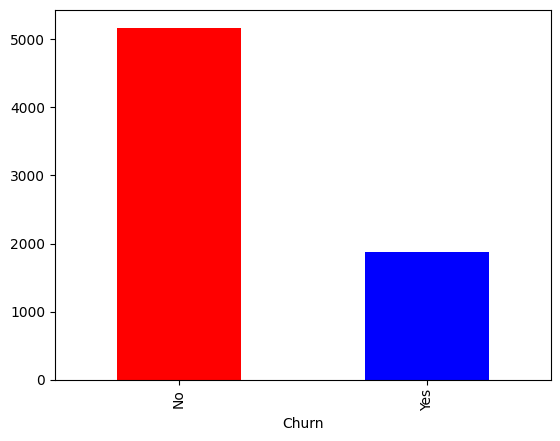

In [207]:
total_churn = df.groupby('Churn')['Churn'].value_counts()
total_churn.plot(kind= 'bar', color= ["red", "blue"])
plt.show()

4.2 Churns por serviço de internet

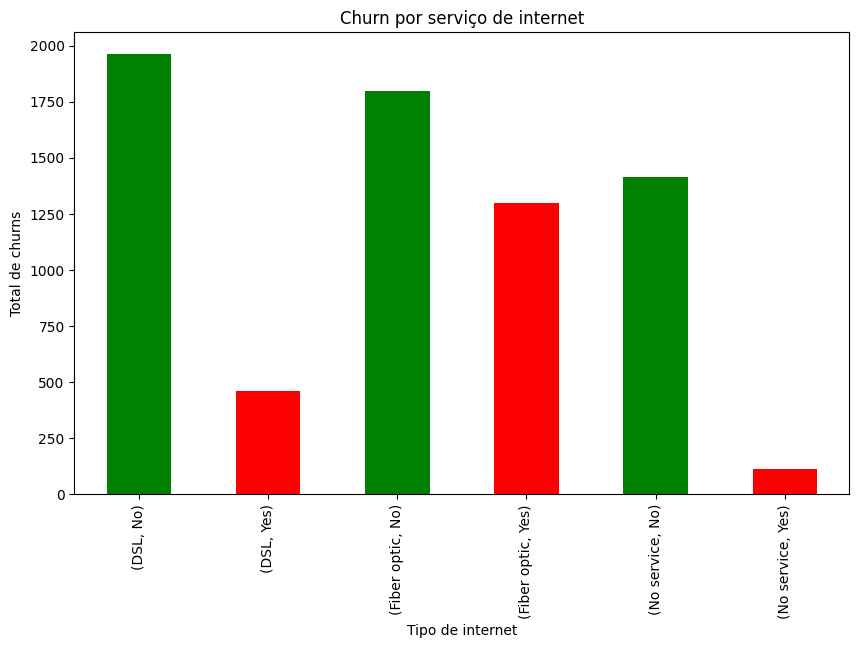

In [208]:
fig, ax = plt.subplots(1, figsize=(10, 6))


internet_churn = df.groupby("internet.InternetService")['Churn'].value_counts()
internet_churn.plot(kind= 'bar', color= ["green", "red"], title= "Churn por serviço de internet", xlabel="Tipo de internet", ylabel="Total de churns")

plt.show()

4.3 Churn por gênero

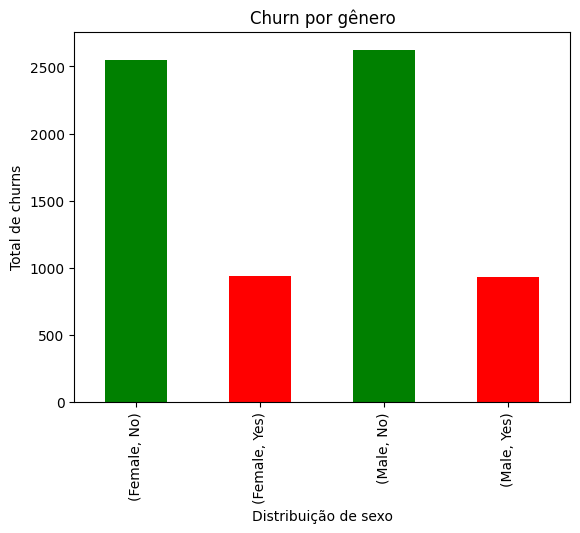

In [209]:
internet_churn = df.groupby("customer.gender")['Churn'].value_counts()
internet_churn.plot(kind= 'bar', color= ["green", "red"], title= "Churn por gênero", xlabel="Distribuição de sexo", ylabel="Total de churns")

plt.show()

4.4 Churn por método de pagamento

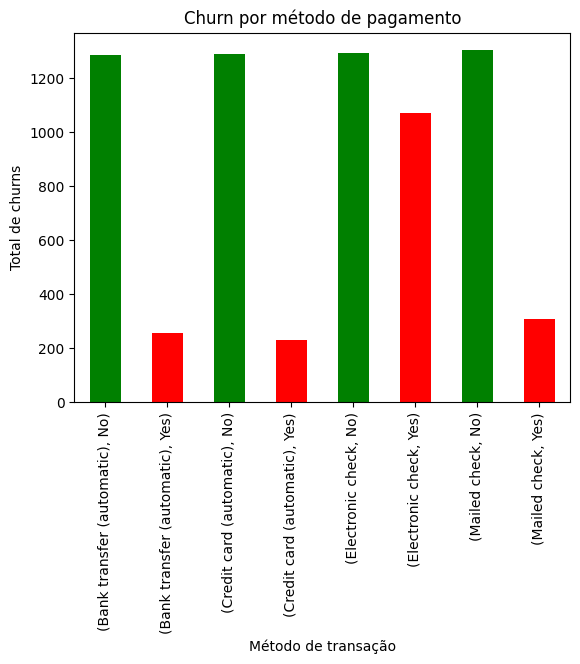

In [210]:
internet_churn = df.groupby("account.PaymentMethod")['Churn'].value_counts()
internet_churn.plot(kind= 'bar', color= ["green", "red"], title= "Churn por método de pagamento", xlabel="Método de transação", ylabel="Total de churns")

plt.show()

Diante desses gráficos, podemos fazer as seguintes conclusões

1. Maioria dos clientes pretendem ficar com o serviço da Novexus

2. Os usuários de fibra óptica e quem paga pelo serviço com cheque eletrônico são os mais provaveis a mudar de operadora

5. Correlações entre variáveis

In [211]:
colunas_df = ['Churn', 
            'customer.Partner', 
            'customer.Dependents',
            'phone.PhoneService', 
            'account.PaperlessBilling', 
            'phone.MultipleLines', 
            'internet.OnlineSecurity', 
            'internet.OnlineBackup',
            'internet.DeviceProtection', 
            'internet.TechSupport', 
            'internet.StreamingTV',
            'internet.StreamingMovies']



In [212]:
for response in colunas_df:
    df[response] = df[response].apply(lambda x: 1 if x == 'Yes' else 0)

df[colunas_df].corr()

,Churn,customer.Partner,customer.Dependents,phone.PhoneService,account.PaperlessBilling,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies
Churn,1.000000,-0.150448,-0.164221,0.011942,0.191825,0.040102,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382
customer.Partner,-0.150448,1.000000,0.452676,0.017706,-0.014877,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412
customer.Dependents,-0.164221,0.452676,1.000000,-0.001762,-0.111377,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741
phone.PhoneService,0.011942,0.017706,-0.001762,1.000000,0.016505,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959
account.PaperlessBilling,0.191825,-0.014877,-0.111377,0.016505,1.000000,0.163530,-0.003636,0.126735,0.103797,0.037880,0.223841,0.211716
phone.MultipleLines,0.040102,0.142057,-0.024526,0.279690,0.163530,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751
internet.OnlineSecurity,-0.171226,0.143106,0.080972,-0.092893,-0.003636,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398
internet.OnlineBackup,-0.082255,0.141498,0.023671,-0.052312,0.126735,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501
internet.DeviceProtection,-0.066160,0.153786,0.013963,-0.071227,0.103797,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111
internet.TechSupport,-0.164674,0.119999,0.063268,-0.096340,0.037880,0.100571,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358


<Axes: >

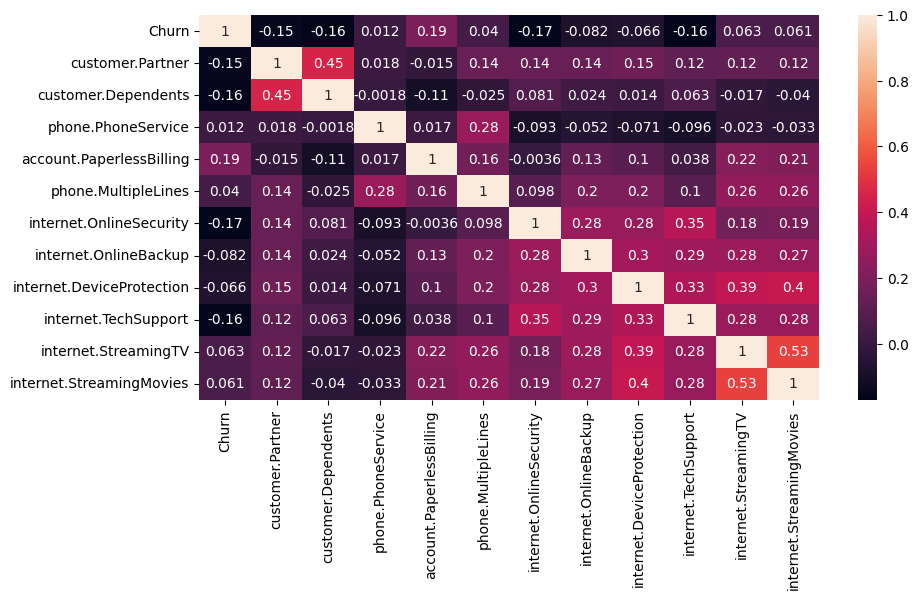

In [216]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[colunas_df].corr(), annot=True)